MIS637 : Knowledge Discovery in Databases - Human Activity Recognition using multi sensor data fusion

In [1]:
import numpy as np
import os
import glob
import pandas as pd
import math

The dataset used is AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\%29 . The dataset contains 7 folders that represent seven types of activities. Ineach folder, there are multiples each of which represents an instant of a human performing an activity. Each file contain's 6 time series collected from activities of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values. Here we put our dataset file names in our dataframe "dataset". It has 7 activities as its columns and each column contains the list of files. Note that our data is in CSV format.

In [2]:
path='C://Users//taksaa//AReM/'
names=['bending1','bending2','cycling','lying','sitting','standing','walking']
dataset=pd.DataFrame()
for i in range(0,len(names)):
    temp=glob.glob(os.path.join(path+names[i],"*.csv"))
    temp2=[]
    temp2.append(temp)
    dataset[names[i]]=temp2
dataset

,bending1,bending2,cycling,lying,sitting,standing,walking
0,[C://Users//taksaa//AReM/bending1\dataset1.csv...,[C://Users//taksaa//AReM/bending2\dataset1.csv...,"[C://Users//taksaa//AReM/cycling\dataset1.csv,...","[C://Users//taksaa//AReM/lying\dataset1.csv, C...","[C://Users//taksaa//AReM/sitting\dataset1.csv,...",[C://Users//taksaa//AReM/standing\dataset1.csv...,"[C://Users//taksaa//AReM/walking\dataset1.csv,..."


To model our data we need to divide our data into train, test and validation sets. This dataset is not very large so hence we will use our train set for cross-validation also. I decided to keep 2 or 3 files from each of the 7 folders as my test set and rest files as training set. Here i put files into train or test depending on the size.

In [3]:
trainfiles=pd.DataFrame()
testfiles=pd.DataFrame()
for i in range(0,len(dataset.iloc[0])):
    train_files=[]
    test_files=[]
    if len(dataset.iloc[0,i])>7:
        test=dataset.iloc[0,i][0:3]
        train=dataset.iloc[0,i][3:]
    else:
        test=dataset.iloc[0,i][0:2]
        train=dataset.iloc[0,i][2:]
    train_files.append(train)
    test_files.append(test)
    trainfiles[names[i]]=train_files
    testfiles[names[i]]=test_files   

here you can see the sample dataset.

In [4]:
df_s=pd.read_csv(trainfiles.iloc[0,0][0],skiprows=4,usecols=range(1,7))
df_s.head()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
0,42.00,0.71,21.25,0.43,30.00,0.00
1,41.50,0.50,20.25,1.48,31.25,1.09
2,41.50,0.50,14.25,1.92,33.00,0.00
3,40.75,0.83,15.75,0.43,33.00,0.00
4,40.00,0.71,20.00,2.74,32.75,0.43


this is the sample features that we used. The final feature frame has all these features unrolled into a single row, i.e. one file is one row with 43 columns with 7 features for each of the time series.

In [5]:
df_s.describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.00000,480.000000,480.000000,480.000000,480.000000
mean,43.954500,0.42625,22.122354,0.497313,35.588458,0.493292
std,1.558835,0.33869,3.030943,0.550657,1.999604,0.513506
min,35.000000,0.00000,6.500000,0.000000,29.000000,0.000000
25%,43.000000,0.00000,19.750000,0.000000,35.362500,0.000000
50%,44.330000,0.47000,23.000000,0.430000,36.000000,0.430000
75%,45.000000,0.50000,24.000000,0.830000,36.500000,0.940000
max,47.400000,1.70000,29.750000,4.440000,38.500000,1.790000


Classification of time series usually needs extracting features from them. In this notebook I have taken in account common features like min, mean, std, max, 25% , 50% and 75%. We use these extracted features to classify our actvities.
Our dataset had labels missing from them.
The function "feature_def" is responsible for reading the csv files, extracting features and subsetting the corresponding features of the 6 times series into a single row.
The Features for the train_set now becomes a dataframe of size 69*49, where 69 is the number of train files and 43 columns is due to 7 features of 6 times series and one label column

In [7]:
def feature_df(files_list,label,l=1):
    feature_df=[]
    frame1=[]
    for i in range(0,len(files_list)):
        feature=[]
        frame2=[]
        df=pd.read_csv(files_list[i],skiprows=4,usecols=range(1,7))
        split_df=np.array_split(df,l)
        shape=split_df[0].shape
        for j in range(0,l):
            split_feature=[]
            split_frame=[]
            for k in range(0,shape[1]):
                temp=split_df[j].iloc[:,k].describe()
                cv=pd.concat([pd.DataFrame([temp[1:].values],columns=temp[1:].name+"_"+temp[1:].index)])
                split_frame.append(cv)
                split_feature=pd.concat(split_frame,axis=1)
            frame2.append(split_feature)
            feature=pd.concat(frame2,axis=0)
            feature["Label"]=label
        frame1.append(feature)
        feature_df=pd.concat(frame1,axis=0)
    
    return feature_df

In [8]:
frame_train=[]
frame_test=[]
train_feature_df=[]
test_feature_df=[]
for i in range(0,7):
    temp_train=feature_df(trainfiles.iloc[0,i],names[i])
    frame_train.append(temp_train)
    train_feature_df=pd.concat(frame_train,axis=0,ignore_index=True)
    temp_test=feature_df(testfiles.iloc[0,i],names[i])
    frame_test.append(temp_test)
    test_feature_df=pd.concat(frame_test,axis=0,ignore_index=True)
    

sample train Feature set

In [9]:
train_feature_df

,avg_rss12_mean,avg_rss12_std,avg_rss12_min,avg_rss12_25%,avg_rss12_50%,avg_rss12_75%,avg_rss12_max,var_rss12_mean,var_rss12_std,var_rss12_min,...,avg_rss23_75%,avg_rss23_max,var_rss23_mean,var_rss23_std,var_rss23_min,var_rss23_25%,var_rss23_50%,var_rss23_75%,var_rss23_max,Label
0,43.954500,1.558835,35.00,43.0000,44.330,45.0000,47.40,0.426250,0.338690,0.0,...,36.5000,38.50,0.493292,0.513506,0.00,0.0000,0.430,0.9400,1.79,bending1
1,42.179813,3.670666,33.00,39.1500,43.500,45.0000,47.75,0.696042,0.630860,0.0,...,36.3300,38.67,0.613521,0.524317,0.00,0.0000,0.500,1.0000,2.18,bending1
2,41.678063,2.243490,33.00,41.3300,41.750,42.7500,45.75,0.535979,0.405469,0.0,...,31.2500,37.50,0.383292,0.389164,0.00,0.0000,0.430,0.5000,1.79,bending1
3,43.454958,1.386098,37.00,42.5000,43.250,45.0000,48.00,0.378083,0.315566,0.0,...,24.0000,33.50,0.679646,0.622534,0.00,0.4300,0.500,0.8700,5.26,bending1
4,43.969125,1.618364,36.25,43.3100,44.500,44.6700,48.00,0.413125,0.263111,0.0,...,23.7500,30.75,0.555313,0.487826,0.00,0.0000,0.490,0.8300,2.96,bending1
5,32.586208,6.238143,21.00,26.1875,33.000,34.5000,50.00,0.516125,0.789957,0.0,...,23.5000,33.75,1.162042,1.332980,0.00,0.4700,0.830,1.3000,13.61,bending2
6,29.881938,1.153837,27.50,29.0000,30.000,30.2700,33.00,0.256438,0.275833,0.0,...,19.0000,23.25,0.701625,0.481103,0.00,0.4700,0.710,0.9400,6.40,bending2
7,30.938104,7.684146,19.00,26.7500,29.000,38.0000,45.50,0.467167,0.734444,0.0,...,20.8125,36.00,1.107354,1.080842,0.00,0.4700,0.830,1.3000,6.73,bending2
8,31.058250,4.829794,25.00,27.5000,29.710,31.8125,47.50,0.405458,0.566668,0.0,...,18.3125,40.33,1.098104,0.831480,0.00,0.5000,0.940,1.3000,4.92,bending2
9,35.752354,4.614802,18.50,33.0000,36.000,39.3300,44.25,3.328104,2.140576,0.0,...,18.0625,24.33,3.069667,1.748326,0.00,1.7975,2.770,4.0600,9.39,cycling


sample test feature set

In [10]:
test_feature_df

,avg_rss12_mean,avg_rss12_std,avg_rss12_min,avg_rss12_25%,avg_rss12_50%,avg_rss12_75%,avg_rss12_max,var_rss12_mean,var_rss12_std,var_rss12_min,...,avg_rss23_75%,avg_rss23_max,var_rss23_mean,var_rss23_std,var_rss23_min,var_rss23_25%,var_rss23_50%,var_rss23_75%,var_rss23_max,Label
0,40.624792,1.476967,37.25,39.2500,40.50,42.0000,45.00,0.358604,0.322605,0.0,...,36.00,38.25,0.570583,0.582915,0.0,0.000,0.430,1.3000,1.92,bending1
1,42.812812,1.435550,38.00,42.0000,42.50,43.6700,45.67,0.372438,0.289158,0.0,...,34.50,38.50,0.571083,0.601010,0.0,0.000,0.430,1.3000,3.11,bending1
2,24.562958,3.737514,12.75,23.1875,24.25,26.5000,51.00,0.590833,0.837408,0.0,...,27.00,30.00,0.700188,0.693720,0.0,0.430,0.500,0.8700,4.97,bending2
3,27.464604,3.583582,0.00,25.5000,28.00,30.0000,42.75,0.449708,0.767197,0.0,...,20.75,33.00,1.122125,1.012342,0.0,0.470,0.830,1.3000,6.76,bending2
4,37.177042,3.581301,24.25,34.5000,36.25,40.2500,45.00,2.374208,1.601799,0.0,...,21.75,25.50,2.921729,1.852600,0.0,1.500,2.500,3.9000,9.34,cycling
5,36.819521,3.900459,27.00,33.7500,36.00,40.2500,45.00,2.600146,1.821404,0.0,...,19.27,24.67,2.887562,1.723094,0.0,1.560,2.525,3.7700,8.99,cycling
6,36.541667,4.018922,27.00,33.2500,36.00,39.8125,44.33,2.847958,1.892397,0.0,...,19.50,24.50,3.225458,1.769758,0.0,1.885,2.870,4.2625,9.18,cycling
7,27.716375,1.442253,23.50,27.0000,27.50,29.0000,30.00,0.363688,0.394817,0.0,...,10.75,21.00,0.734271,0.613688,0.0,0.430,0.710,1.0000,4.50,lying
8,27.716375,1.442253,23.50,27.0000,27.50,29.0000,30.00,0.363688,0.394817,0.0,...,10.75,21.00,0.735396,0.612834,0.0,0.430,0.710,1.0000,4.50,lying
9,48.004167,0.032038,48.00,48.0000,48.00,48.0000,48.25,0.007167,0.055106,0.0,...,10.00,12.00,0.641229,0.388372,0.0,0.460,0.500,0.8300,2.50,lying


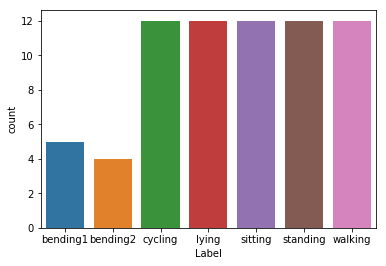

In [13]:
#viewing the count of labels in our dataset-train
import seaborn as sns
y=train_feature_df.Label
ax = sns.countplot(y,label="Count")
ax

In [14]:
#scaling/standardizing  the datasets SCALING between 0 and 1
from sklearn.preprocessing import MinMaxScaler
def scale(df):
    scaled_df=MinMaxScaler().fit_transform(df)
    return scaled_df

In [15]:
train_feature_df.iloc[:,0:-1]=scale(train_feature_df.iloc[:,0:-1])
test_feature_df.iloc[:,0:-1]=scale(test_feature_df.iloc[:,0:-1])

train_feature set after min-max normalization

In [16]:
train_feature_df

,avg_rss12_mean,avg_rss12_std,avg_rss12_min,avg_rss12_25%,avg_rss12_50%,avg_rss12_75%,avg_rss12_max,var_rss12_mean,var_rss12_std,var_rss12_min,...,avg_rss23_75%,avg_rss23_max,var_rss23_mean,var_rss23_std,var_rss23_min,var_rss23_25%,var_rss23_50%,var_rss23_75%,var_rss23_max,Label
0,0.800389,0.199526,0.729167,0.770774,0.820976,0.6400,0.662857,0.094194,0.110327,0.0,...,1.000000,0.935404,0.034952,0.079434,0.0,0.000000,0.000000,0.106861,0.000000,bending1
1,0.712913,0.475507,0.687500,0.594269,0.780488,0.6400,0.676190,0.154832,0.223993,0.0,...,0.994509,0.941405,0.073153,0.086297,0.0,0.000000,0.024055,0.121433,0.032995,bending1
2,0.688182,0.288999,0.687500,0.694212,0.695122,0.5500,0.600000,0.118857,0.136306,0.0,...,0.830413,0.900106,0.000000,0.000503,0.0,0.000000,0.000000,0.000000,0.000000,bending1
3,0.775766,0.176953,0.770833,0.747851,0.768293,0.6400,0.685714,0.083368,0.101330,0.0,...,0.596221,0.758913,0.094164,0.148644,0.0,0.191964,0.024055,0.089860,0.293570,bending1
4,0.801110,0.207306,0.755208,0.784986,0.829268,0.6268,0.685714,0.091244,0.080923,0.0,...,0.588145,0.661843,0.054658,0.063133,0.0,0.000000,0.020619,0.080146,0.098985,bending1
5,0.240038,0.811032,0.437500,0.000000,0.268293,0.2200,0.761905,0.114394,0.285889,0.0,...,0.580069,0.767737,0.247442,0.599632,0.0,0.209821,0.137457,0.194293,1.000000,bending2
6,0.106742,0.146600,0.572917,0.128940,0.121951,0.0508,0.114286,0.056026,0.085872,0.0,...,0.434709,0.397106,0.101148,0.058865,0.0,0.209821,0.096220,0.106861,0.390017,bending2
7,0.158801,1.000000,0.395833,0.025788,0.073171,0.3600,0.590476,0.103390,0.264292,0.0,...,0.493257,0.847158,0.230065,0.439576,0.0,0.209821,0.137457,0.194293,0.417936,bending2
8,0.164723,0.626985,0.520833,0.060172,0.107805,0.1125,0.666667,0.089521,0.199020,0.0,...,0.412501,1.000000,0.227126,0.281283,0.0,0.223214,0.175258,0.194293,0.264805,bending2
9,0.396099,0.598889,0.385417,0.312321,0.414634,0.4132,0.542857,0.746418,0.811338,0.0,...,0.404425,0.435228,0.853574,0.863291,0.0,0.802455,0.804124,0.864602,0.642978,cycling


training an Artificial Neural Network to predict our activities

In [63]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(train_feature_df.iloc[:,0:-2],train_feature_df.iloc[:,42])


C:\Users\taksaa\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [64]:
predictions=mlp.predict(test_feature_df.iloc[:,0:-2])

confusion matrix and classification report

In [81]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Confusion Matrix\n",confusion_matrix(test_feature_df.iloc[:,42],predictions),"\n")
print("Classification Report\n\n",classification_report(test_feature_df.iloc[:,42],predictions))

Confusion Matrix
 [[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 3 0 0]
 [0 0 0 1 1 1 0]
 [0 0 0 0 0 0 3]] 

Classification Report

              precision    recall  f1-score   support

   bending1       1.00      1.00      1.00         2
   bending2       1.00      1.00      1.00         2
    cycling       1.00      1.00      1.00         3
      lying       0.75      1.00      0.86         3
    sitting       0.75      1.00      0.86         3
   standing       1.00      0.33      0.50         3
    walking       1.00      1.00      1.00         3

avg / total       0.92      0.89      0.88        19



Final Accuracy of Classifier

In [74]:
print(accuracy_score(test_feature_df.iloc[:,42],predictions)*100,"%")

89.47368421052632 %
